<a href="https://colab.research.google.com/github/matdcp/Data-Driven-Market-strategy-fo-Too-Good-to-Go/blob/main/dati_francesi_con_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving chambery.txt to chambery.txt


In [92]:
import pandas as pd

txt_path = "/content/chambery.txt"

df = pd.read_csv(txt_path, sep=",")

print(df.head())


<ipython-input-92-64ca3c3ac007>:5: DtypeWarning: Columns (10,15,16,17,18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_path, sep=",")


  station             valid     lon      lat  elevation   tmpf   dwpf   relh  \
0    LFLB  1990-01-01 00:00  5.8831  45.6367      239.0  22.46  21.00  94.09   
1    LFLB  1990-01-01 03:00  5.8831  45.6367      239.0  20.12  18.50  93.31   
2    LFLB  1990-01-01 05:00  5.8831  45.6367      239.0  19.40  17.60  92.57   
3    LFLB  1990-01-01 06:00  5.8831  45.6367      239.0  19.40  17.42  91.85   
4    LFLB  1990-01-01 07:23  5.8831  45.6367      239.0  17.60  15.80  92.50   

    drct  sknt  ... wxcodes  ice_accretion_1hr  ice_accretion_3hr  \
0  100.0   2.0  ...     NaN                NaN                NaN   
1  140.0   2.0  ...     NaN                NaN                NaN   
2  140.0   2.0  ...     NaN                NaN                NaN   
3    0.0   0.0  ...     NaN                NaN                NaN   
4    0.0   0.0  ...     NaN                NaN                NaN   

   ice_accretion_6hr  peak_wind_gust peak_wind_drct peak_wind_time   feel  \
0                NaN       

In [82]:
df.to_csv("chambery.csv", index=False)

In [93]:
import pandas as pd


total_rows = len(df)


nan_counts = df.isnull().sum()


null_percentage = (nan_counts / total_rows) * 100


columns_with_many_nans = null_percentage[null_percentage > 50]


columns_with_less_50 = null_percentage[null_percentage < 50]


columns_with_less_30 = null_percentage[null_percentage < 30]


print(f"\n🔹 The dataset contains {total_rows} rows.\n")

print("📌 Nan counts for column:")
print(nan_counts.sort_values(ascending=False).to_string())  # Print pulito

print("\n📌 Nan percentage for column:")
print(null_percentage.sort_values(ascending=False).to_string())

print("\n🚨 Colunms with more than 50% of Nan:")
print(columns_with_many_nans.sort_values(ascending=False).to_string())

print("\n✅ Colunms with less than 50% of Nan:")
print(columns_with_less_50.sort_values(ascending=False).to_string())

print("\n✅ Colunms with less than 30% of Nan:")
print(columns_with_less_30.sort_values(ascending=False).to_string())



🔹 The dataset contains 422765 rows.

📌 Nan counts for column:
peak_wind_time       422765
peak_wind_gust       422765
ice_accretion_6hr    422765
ice_accretion_3hr    422765
peak_wind_drct       422765
ice_accretion_1hr    422765
snowdepth            422765
skyl4                422604
gust                 418895
skyc4                410378
skyl3                366968
skyc3                362281
wxcodes              360546
mslp                 344360
skyl2                303834
skyc2                301961
skyl1                236307
skyc1                177037
p01i                 168649
drct                  74630
alti                  27581
vsby                  13414
sknt                   3636
feel                   3509
relh                   2015
dwpf                   1929
tmpf                    423
station                   0
valid                     0
elevation                 0
lat                       0
lon                       0
metar                     0

📌 Nan percen

In [94]:
columns_with_less_30 = null_percentage[null_percentage < 30].index

df2 = df[columns_with_less_30].copy()
print(df2.head())
num_columns = df2.shape[1]

print("\n✅ Colonne df2:")
print(num_columns)


  station             valid     lon      lat  elevation   tmpf   dwpf   relh  \
0    LFLB  1990-01-01 00:00  5.8831  45.6367      239.0  22.46  21.00  94.09   
1    LFLB  1990-01-01 03:00  5.8831  45.6367      239.0  20.12  18.50  93.31   
2    LFLB  1990-01-01 05:00  5.8831  45.6367      239.0  19.40  17.60  92.57   
3    LFLB  1990-01-01 06:00  5.8831  45.6367      239.0  19.40  17.42  91.85   
4    LFLB  1990-01-01 07:23  5.8831  45.6367      239.0  17.60  15.80  92.50   

    drct  sknt   alti  vsby   feel  \
0  100.0   2.0    NaN   NaN  22.46   
1  140.0   2.0    NaN   NaN  20.12   
2  140.0   2.0  30.12   3.0  19.40   
3    0.0   0.0  30.12   3.0  19.40   
4    0.0   0.0  30.15   1.0  17.60   

                                               metar  
0  LFLB 010000Z AUTO 10002KT M05/M06 RMK SLP235 T...  
1  LFLB 010300Z AUTO 14002KT M07/M08 RMK SLP233 T...  
2  LFLB 010500Z AUTO 14002KT 3SM M07/M08 A3012 RM...  
3  LFLB 010600Z AUTO 00000KT 3SM M07/M08 A3012 RM...  
4  LFLB 010723Z

Ho pensato rimuovere le righe con i null fa perdere la dipendenza temporale, che useremo nel nostro modello, quindi ho cercato i modi migliori per gestire i NAN, sostituendo i missing values per con il valore al tempo t precedente, in modo da mantenere la struttura della serie temporale.
Tranne drct che rappresenta la direzione del vento che può avere cambiamenti bruschi quindi il dato precedente non è rappresentativo come per la temperatura o l'umidità.


In [95]:

exclude_columns = ['drct']

# Backward fill per tutte le colonne tranne 'drct'
df2.loc[:, ~df2.columns.isin(exclude_columns)] = df2.loc[:, ~df2.columns.isin(exclude_columns)].bfill()

# Interpolazione lineare per 'drct' per una transizione più graduale
df2['drct'] = df2['drct'].interpolate(method='linear', limit_direction='both')

print(df2.isnull().sum())


station      0
valid        0
lon          0
lat          0
elevation    0
tmpf         0
dwpf         0
relh         0
drct         0
sknt         0
alti         0
vsby         0
feel         0
metar        0
dtype: int64


In [96]:
print(df2.dtypes)

station       object
valid         object
lon          float64
lat          float64
elevation    float64
tmpf         float64
dwpf         float64
relh         float64
drct         float64
sknt         float64
alti         float64
vsby         float64
feel         float64
metar         object
dtype: object


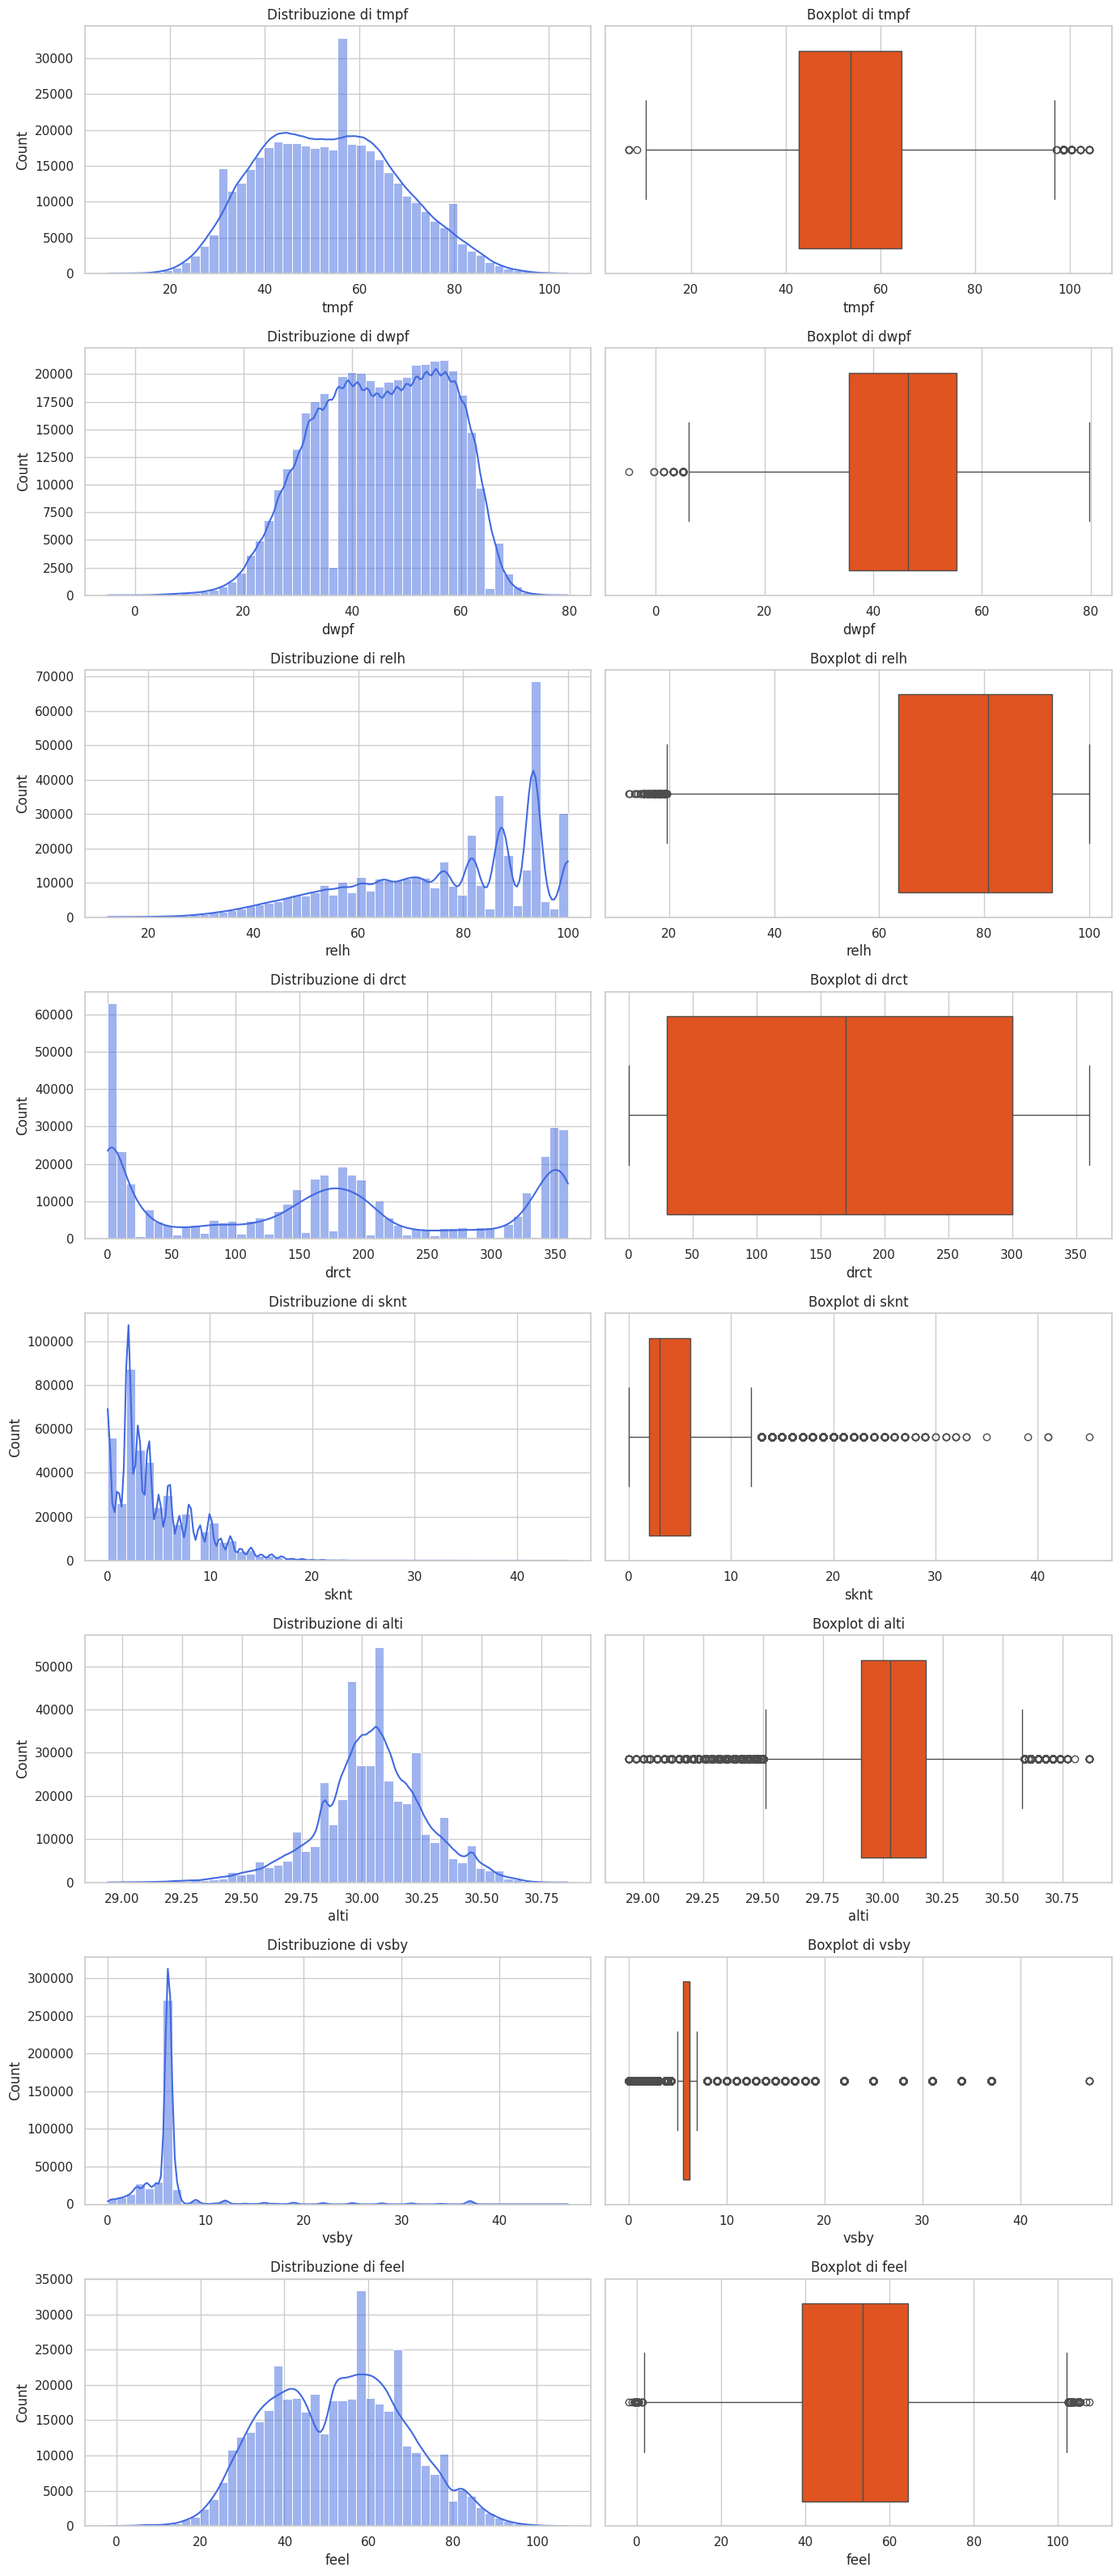

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni di stile
sns.set(style="whitegrid")

# Escludiamo colonne costanti
exclude_cols = ['lon', 'lat', 'elevation']
numeric_cols = [col for col in df2.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

# Creazione dei grafici
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(14, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols):
    # Istogramma della distribuzione
    sns.histplot(df2[col], bins=50, kde=True, ax=axes[i, 0], color='royalblue')
    axes[i, 0].set_title(f'Distribuzione di {col}')

    # Boxplot per individuare outlier
    sns.boxplot(x=df2[col], ax=axes[i, 1], color='orangered')
    axes[i, 1].set_title(f'Boxplot di {col}')

# Ottimizzazione del layout
plt.tight_layout()
plt.show()


In [100]:
len(df2)

422765

In [106]:
df2['valid'] = pd.to_datetime(df2['valid'])  # Conversione in datetime

# Creazione delle feature temporali
df2['year'] = df2['valid'].dt.year
df2['month'] = df2['valid'].dt.month
df2['day'] = df2['valid'].dt.day
df2['hour'] = df2['valid'].dt.hour

df2.drop(columns=['metar'], inplace = True)


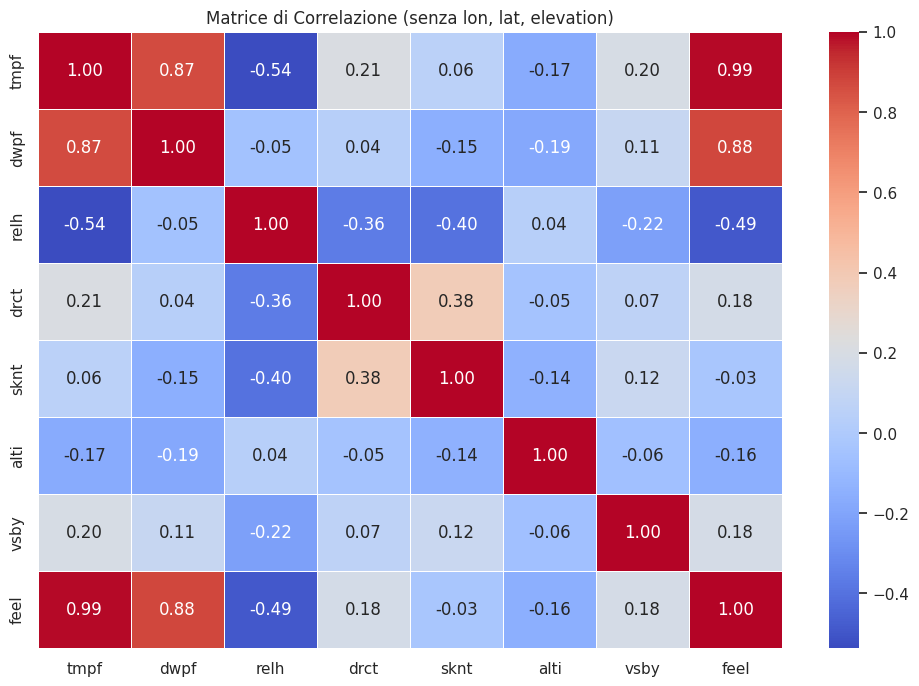

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Escludiamo le colonne non rilevanti per la correlazione
exclude_cols = ['lon', 'lat', 'elevation']
numeric_cols = [col for col in df2.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

# Calcoliamo la matrice di correlazione solo con le variabili scelte
corr_matrix = df2[numeric_cols].corr()

# Plot della matrice di correlazione
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice di Correlazione (senza lon, lat, elevation)")
plt.show()


# rimuoviamo il punto di ruggiada per l'insight 1 , perchè ci serve la temperatura e sono altamente correlati.



In [108]:
df2.drop(columns='dwpf', inplace = True)

In [109]:
# Temperature conversion in Celsius
df2['tmpc'] = (df2['tmpf'] - 32) * 5 / 9
df2['feelc'] = (df2['feel'] - 32) * 5 / 9

df2.drop(columns=['tmpf', 'feel'], inplace=True)

print(df2[['tmpc', 'feelc']].head())


   tmpc  feelc
0  -5.3   -5.3
1  -6.6   -6.6
2  -7.0   -7.0
3  -7.0   -7.0
4  -8.0   -8.0


# Temperature Trend Analysis

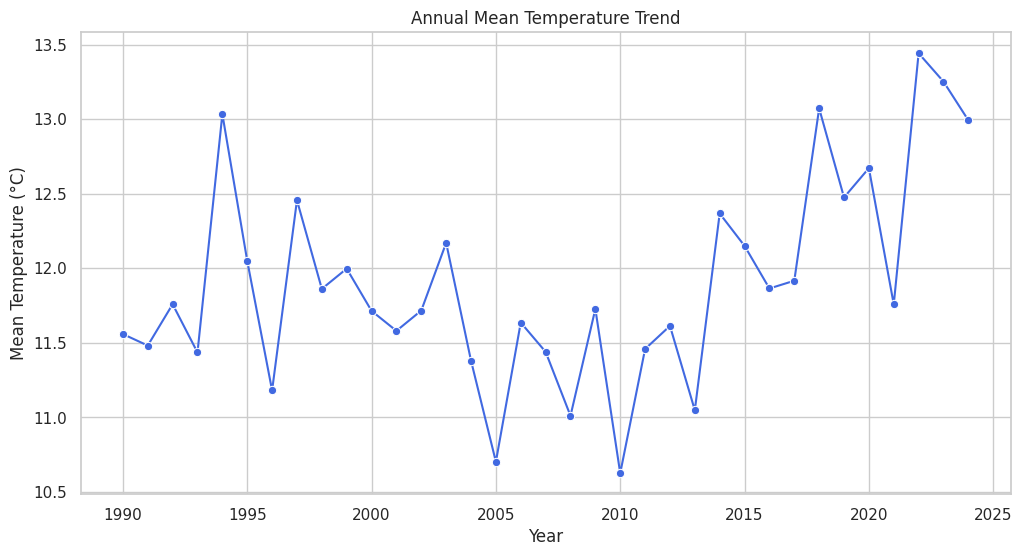

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

df2['valid'] = pd.to_datetime(df2['valid'])

# Extract the year for trend analysis
df2['year'] = df2['valid'].dt.year

# Compute the annual mean temperature
df_trend = df2.groupby('year')['tmpc'].mean()

# Plot the temperature trend over the years
plt.figure(figsize=(12,6))
sns.lineplot(x=df_trend.index, y=df_trend.values, marker='o', color='royalblue')
plt.title("Annual Mean Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.grid(True)
plt.show()


# HEATWAVES DETECTION

threshold di 35 gradi.

In [111]:
# Heatwave threshold (35°C)
heatwave_threshold = 35

# Create a new column indicating heatwave events
df2['heatwave'] = df2['tmpc'] > heatwave_threshold

# Count the number of heatwave days per year
heatwave_trend = df2.groupby('year')['heatwave'].sum()

# Filter only the days with heatwaves
heatwave_days = df2[df2['heatwave'] == True][['valid', 'tmpc', 'year', 'month', 'day']]

# Display first values of the heatwave trend
print("\n📌 Heatwave Days Per Year:\n")
print(heatwave_trend.head())

# Display all recorded heatwave days
print("\n📌 Recorded Heatwave Days (Temperature > 35°C):\n")
print(heatwave_days.head(20))  # Show first 20 occurrences



📌 Heatwave Days Per Year:

year
1990    0
1991    0
1992    0
1993    0
1994    0
Name: heatwave, dtype: int64

📌 Recorded Heatwave Days (Temperature > 35°C):

                    valid       tmpc  year  month  day
92613 2003-06-22 17:00:00  35.722222  2003      6   22
92683 2003-06-25 15:00:00  35.888889  2003      6   25
92684 2003-06-25 15:30:00  36.000000  2003      6   25
92685 2003-06-25 16:00:00  36.000000  2003      6   25
93147 2003-07-14 15:00:00  36.000000  2003      7   14
93148 2003-07-14 16:00:00  36.000000  2003      7   14
93149 2003-07-14 17:00:00  35.777778  2003      7   14
93269 2003-07-19 15:00:00  36.000000  2003      7   19
93270 2003-07-19 16:00:00  36.000000  2003      7   19
93271 2003-07-19 17:00:00  35.222222  2003      7   19
93294 2003-07-20 15:00:00  37.000000  2003      7   20
93295 2003-07-20 16:00:00  36.000000  2003      7   20
93438 2003-07-26 15:00:00  36.000000  2003      7   26
93652 2003-08-04 14:00:00  36.000000  2003      8    4
93653 2003-08-

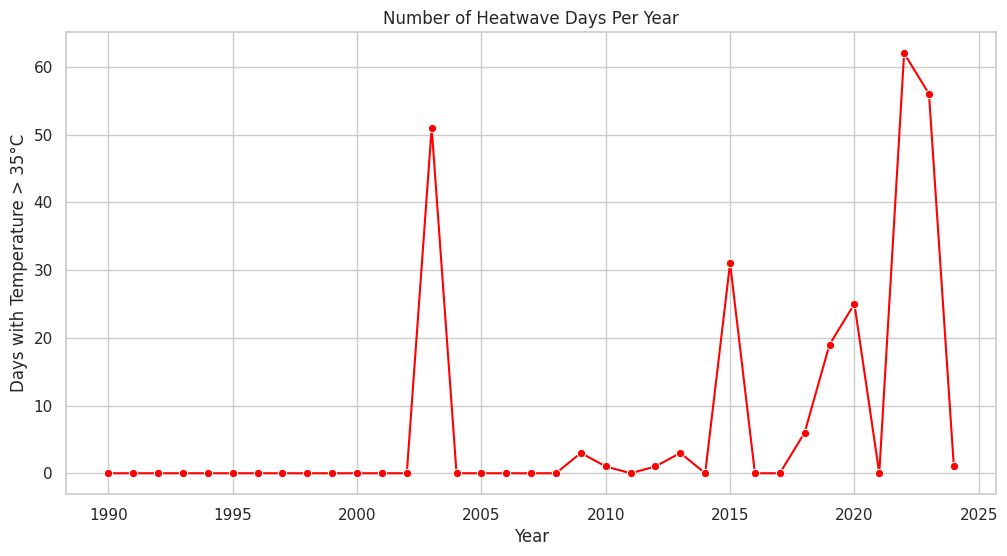

In [112]:
# Plot the number of heatwave days per year
plt.figure(figsize=(12,6))
sns.lineplot(x=heatwave_trend.index, y=heatwave_trend.values, marker='o', color='red')
plt.title("Number of Heatwave Days Per Year")
plt.xlabel("Year")
plt.ylabel("Days with Temperature > 35°C")
plt.grid(True)
plt.show()


In [113]:
print(df2.dtypes)

station              object
valid        datetime64[ns]
lon                 float64
lat                 float64
elevation           float64
relh                float64
drct                float64
sknt                float64
alti                float64
vsby                float64
year                  int32
month                 int32
day                   int32
hour                  int32
tmpc                float64
feelc               float64
heatwave               bool
dtype: object


MinMax SCALER : FEATURE NORMALIZATION

In [114]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['tmpc', 'feelc', 'relh', 'drct', 'sknt', 'alti', 'vsby']
scaler = MinMaxScaler()

df2[num_features] = scaler.fit_transform(df2[num_features])



In [115]:
print(df2.dtypes)
print(df2.head())


station              object
valid        datetime64[ns]
lon                 float64
lat                 float64
elevation           float64
relh                float64
drct                float64
sknt                float64
alti                float64
vsby                float64
year                  int32
month                 int32
day                   int32
hour                  int32
tmpc                float64
feelc               float64
heatwave               bool
dtype: object
  station               valid     lon      lat  elevation      relh      drct  \
0    LFLB 1990-01-01 00:00:00  5.8831  45.6367      239.0  0.932650  0.277778   
1    LFLB 1990-01-01 03:00:00  5.8831  45.6367      239.0  0.923761  0.388889   
2    LFLB 1990-01-01 05:00:00  5.8831  45.6367      239.0  0.915328  0.388889   
3    LFLB 1990-01-01 06:00:00  5.8831  45.6367      239.0  0.907123  0.000000   
4    LFLB 1990-01-01 07:23:00  5.8831  45.6367      239.0  0.914530  0.000000   

       sknt      alti  

In [116]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


features = ['tmpc', 'feelc', 'relh', 'drct', 'sknt', 'alti', 'vsby']
target = 'tmpc'


scaler = MinMaxScaler()
df2[features] = scaler.fit_transform(df2[features])

# Creazione delle sequenze temporali
def create_sequences(data, target_column, seq_length=90, pred_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length : i + seq_length + pred_length, target_column])
    return np.array(X), np.array(y)

# Convertiamo il DataFrame in numpy array
data_array = df2[features].values
target_index = features.index(target)

# Creiamo le sequenze
X, y = create_sequences(data_array, target_index, seq_length=90, pred_length=30)

# Divisione train/test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Controllo delle dimensioni del dataset
print(f"Shape X_train: {X_train.shape}, Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, Shape y_test: {y_test.shape}")


Shape X_train: (338116, 90, 7), Shape y_train: (338116, 30)
Shape X_test: (84529, 90, 7), Shape y_test: (84529, 30)


In [117]:
# Costruzione del modello LSTM
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(30)  # 30 output per i 30 giorni futuri
])

# Compilazione del modello
model.compile(optimizer='adam', loss='mse')

# Visualizzazione del modello
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 90, 100)             │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │           1,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,930 (292.70 KB)

 Trainable params: 74,930 (292.70 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Addestramento del modello LSTM
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 120s 11ms/step - loss: 0.0089 - val_loss: 0.0024
Epoch 2/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 137s 11ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 3/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 121s 11ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 4/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 149s 12ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 135s 11ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 6/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 142s 11ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 162s 13ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 8/50
10567/10567 ━━━━━━━━━━━━━━━━━━━━ 129s 12ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 9/50
10564/10567 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020

KeyboardInterrupt: 

 Conclusioni parziali:
✔ Il modello sta convergendo correttamente.
✔ La val_loss è simile alla loss di training, quindi il modello non sta overfittando.
✔ Possiamo aspettarci buone previsioni sui dati di test.
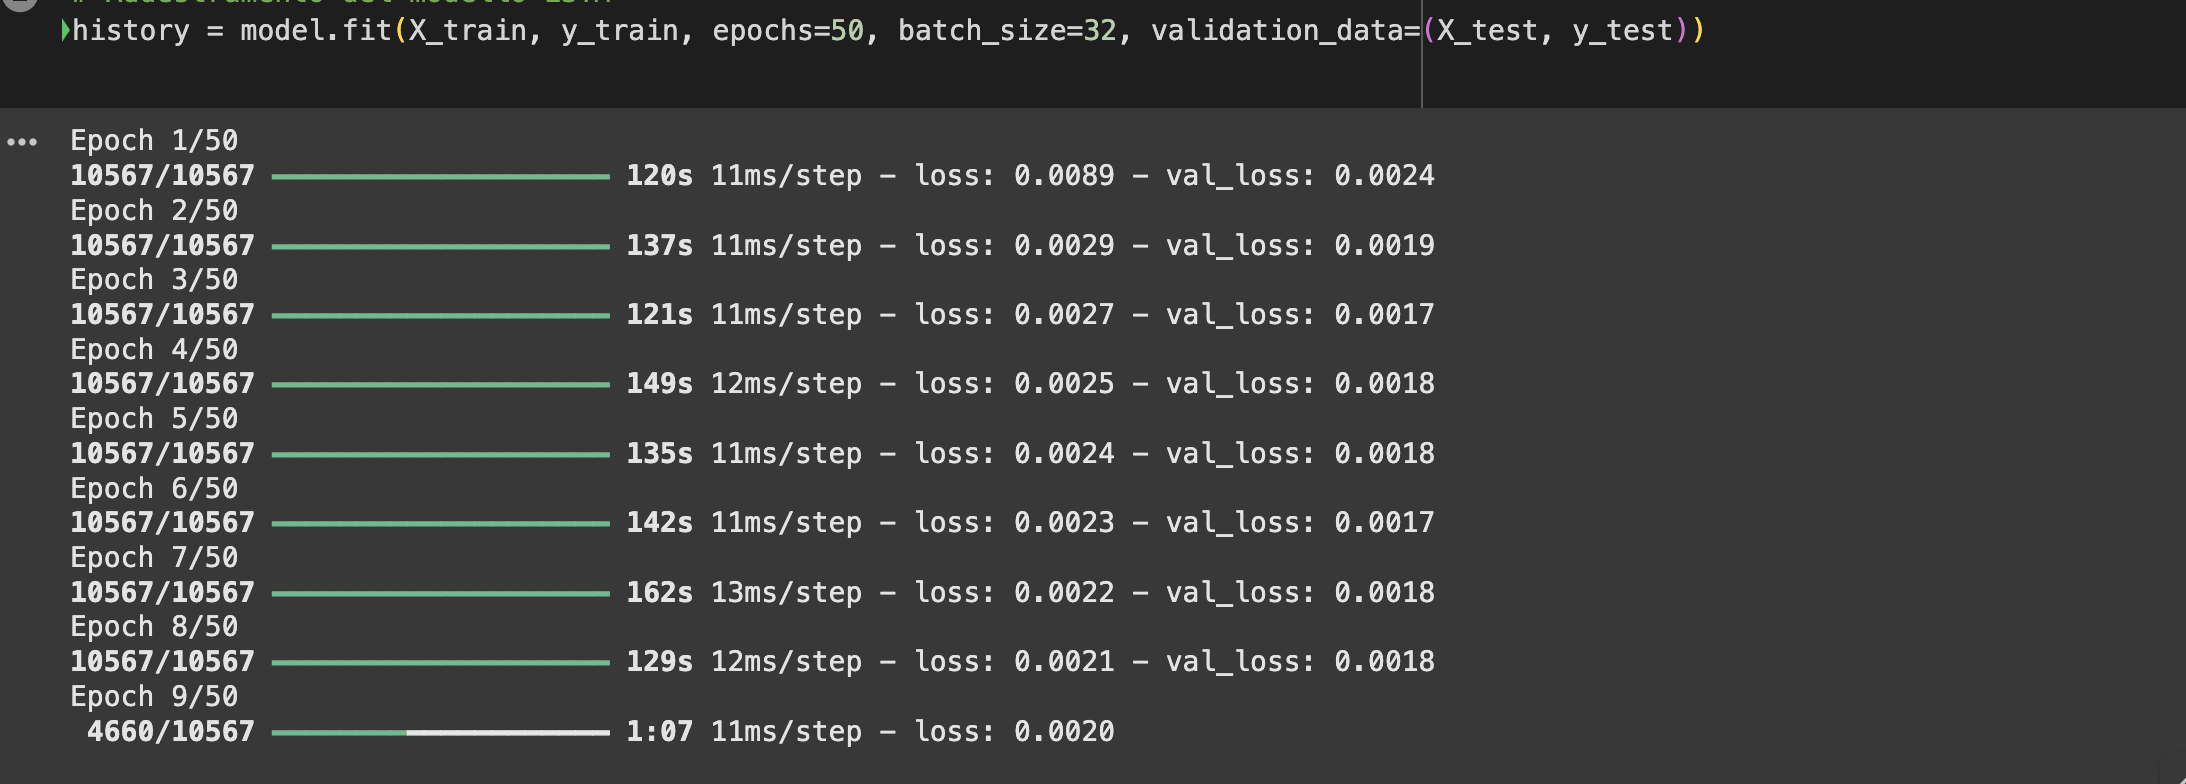


In [ ]:
import matplotlib.pyplot as plt

# Previsioni sui dati di test
y_pred = model.predict(X_test)

# Visualizziamo le previsioni e i valori reali
plt.figure(figsize=(12,6))
plt.plot(y_test[-1], label="Valori Reali", color='blue')
plt.plot(y_pred[-1], label="Previsioni LSTM", color='red')
plt.title("Previsioni a 30 Giorni vs Valori Reali")
plt.xlabel("Giorni Futuri")
plt.ylabel("Temperatura Normalizzata")
plt.legend()
plt.show()


provare a usare il nostro LSTM di solana e migliorarlo.

Pro è più flessibile con la classe possiamo entrare in ogni layer , con pythorch possiamo fare anche modelli ibridi che servono per le previsioni di lungo periodo a 1 anno e 2050 .

Contro più instabile se non ottimizzato nel modo giusto e potenzialmente  + complesso dal punto di vista computazionale.

In [ ]:
#ci sono i dati di solana va adattato al nostro caso


class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout=0.2):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.dropout = dropout

        # First LSTM layer
        self.lstm1 = nn.LSTM(input_size, hidden_size, 1, batch_first=True)
        # Dropout layer
        self.dropout_layer = nn.Dropout(dropout)
        # Second LSTM layer
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, 1, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initial hidden state and cell state for the first LSTM layer
        h0_1 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0_1 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        # Forward pass through the first LSTM layer
        out, _ = self.lstm1(x, (h0_1, c0_1))

        # Forward pass through the dropout layer
        out = self.dropout_layer(out)

        # Initial hidden state and cell state for the second LSTM layer
        h0_2 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0_2 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        # Forward pass through the second LSTM layer
        out, _ = self.lstm2(out, (h0_2, c0_2))

        # Forward pass through the fully connected layer
        out = self.fc(out[:, -1, :])
        return out
